<a href="https://colab.research.google.com/github/NaveenkumarC14/Cardiovascular-Disease-EDA-and-Analytics/blob/main/Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb


***Load The Data***

In [4]:
from google.colab import files
uploaded=files.upload()


Saving cardio_train.csv to cardio_train.csv


**Store the data into a variable**

In [5]:
data=pd.read_csv("cardio_train.csv",sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Get the shape of the data**

In [6]:
data.shape


(70000, 13)


**Count the empty values in each column**

In [7]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

**Another way to find any null or missing values**

In [8]:
data.isnull().values.any()

False

**View some basic Statistics**

In [9]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**Get a count of the number of patients with a Cardiovascular disease and without**

In [14]:
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

**Visualize the count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


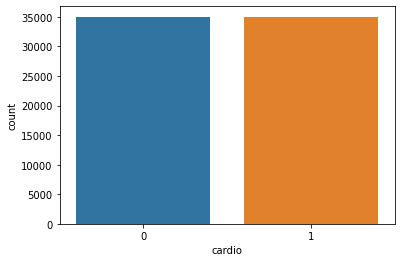

In [15]:
sb.countplot(data["cardio"])

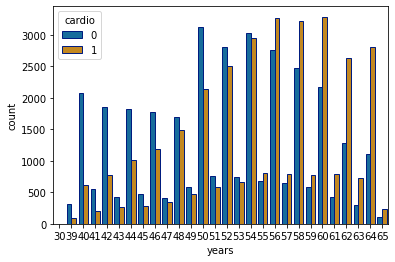

In [16]:
data['years']=(data['age']/365).round(0)
data["years"]=pd.to_numeric(data["years"],downcast='integer')

#Visualize the data
sb.countplot(x='years',hue='cardio',data=data,palette='colorblind',edgecolor=sb.color_palette('dark',n_colors=1))

**Visualize the Correlation**

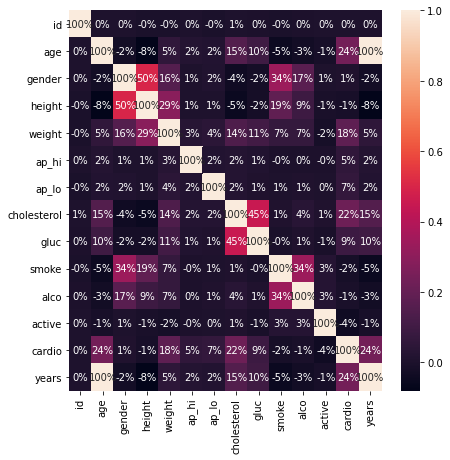

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sb.heatmap(data.corr(),annot=True,fmt='.0%')

**Remove or the id column**

In [18]:
data=data.drop('id',axis=1)

**Remove or the year Column**

In [19]:
data=data.drop('years',axis=1)

**Split the data into feature data and target data**

In [20]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

**Split the data again, into 75% training data set and 25% testing dataset**

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)


**Feature Selection,**
**Scale the various in the data to be values between 0 and 1 inclusive**

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Use Random Forest Classifier**

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

**Test the Model Accuracy on the training data set**

In [24]:
model=forest
model.score(x_train,y_train)

0.979904761904762

**Test the Model Accuracy on the test data set**

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model.predict(x_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

#Print the Confusion matrix
print(cm)

#Print the model Accuracy on the data 
print("Model test Accuracy={}".format((TP+TN)/(TP+TN+FN+FP)))

[[6487 2122]
 [3093 5798]]
Model test Accuracy=0.702


**KNN** Algorithm

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)


In [28]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV

KNN = KNeighborsClassifier()
param_grid_KNN = {
    'n_neighbors' : [23, 25, 27], 
    'weights' : ['uniform', 'distance']
}



In [30]:
#GS_KNN = GridSearchCV(KNN, param_grid_KNN, n_jobs= 3)
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
model=KNN
model.score(x_train,y_train)

0.767125

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model.predict(x_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

#Print the Confusion matrix
print(cm)

#Print the model Accuracy on the data 
print("Model test Accuracy={}".format((TP+TN)/(TP+TN+FN+FP)))

[[4726 2191]
 [2664 4419]]
Model test Accuracy=0.6532142857142857


**Decision Tree**

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
cm=confusion_matrix(y_test,model.predict(x_test))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7281904761904762


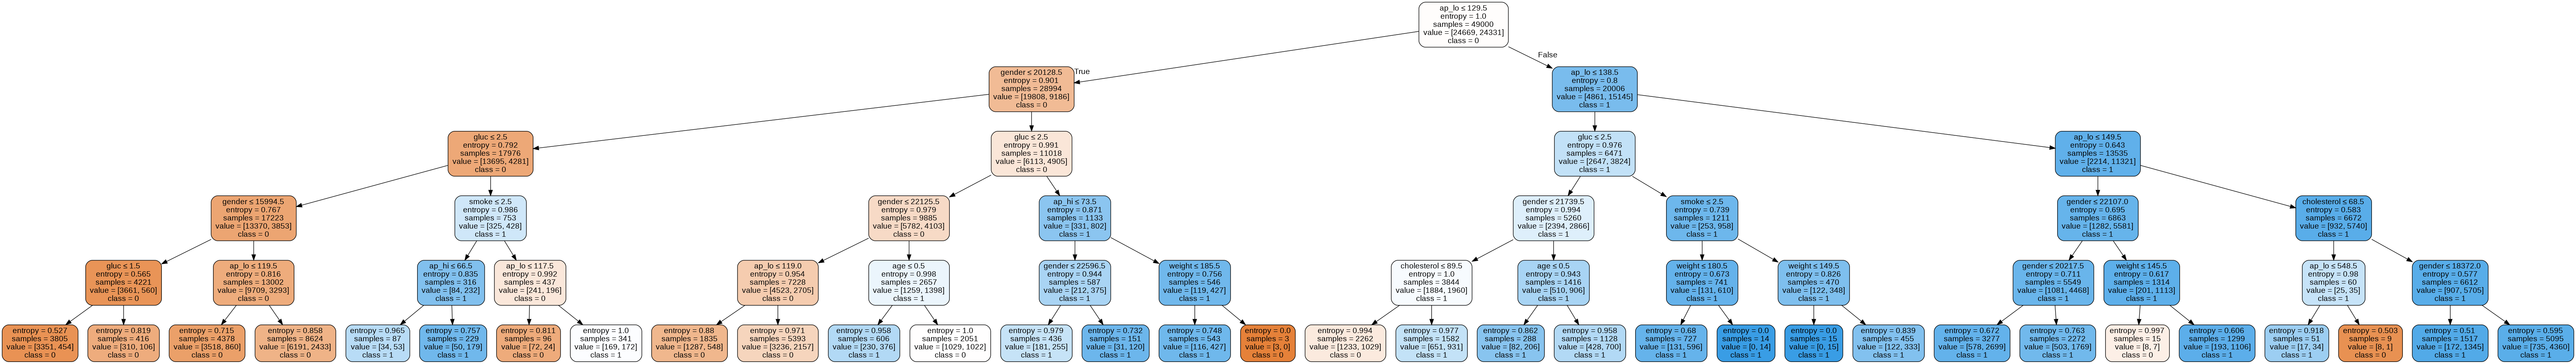

In [35]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
x1=['gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc'	,'smoke',	'alco','active','age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x1,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('FIGURE.png')
Image(graph.create_png())